<a href="https://colab.research.google.com/github/anandusateeshNSUT/SMS-Spam-Ham-Classification/blob/main/Spam_Ham_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import nltk
import pandas as pd

In [15]:
df=pd.read_csv("/content/spam.csv",encoding='latin-1')

In [16]:
df.dropna(inplace=True, axis=1)

In [21]:
df.columns = ['label', 'message']
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [23]:
df.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [24]:
df['label_num'] = df.label.map({'ham':0, 'spam':1})
df.head()

,label,message,label_num
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [25]:
df['message_len'] = df.message.apply(len)
df.head()

,label,message,label_num,message_len
0,ham,"Go until jurong point, crazy.. Available only ...",0,111
1,ham,Ok lar... Joking wif u oni...,0,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,ham,U dun say so early hor... U c already then say...,0,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61


In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Text(0.5, 0, 'Message Length')

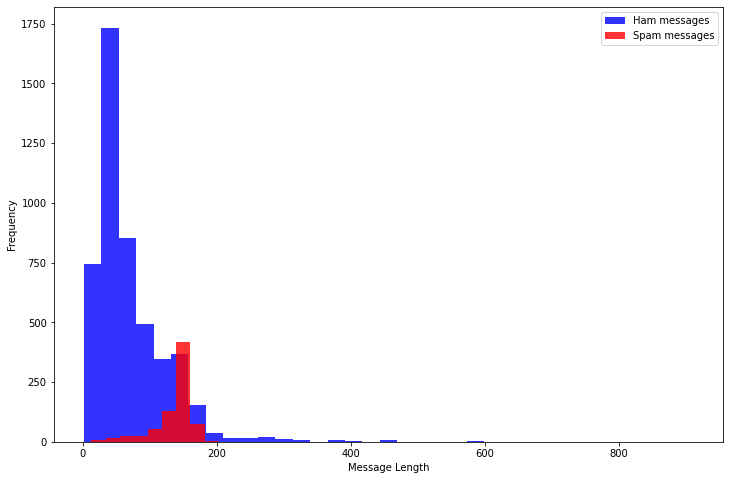

In [31]:
plt.figure(figsize=(12,8))
df[df.label=='ham'].message_len.plot(bins=35, kind='hist', color='blue', 
                                       label='Ham messages', alpha=0.8)
df[df.label=='spam'].message_len.plot(kind='hist', color='red', 
                                       label='Spam messages', alpha=0.8)
plt.legend()
plt.xlabel("Message Length")

In [38]:
import string
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [35]:
def text_process(mess):

    STOPWORDS = stopwords.words('english')
  
    nopunc = [char for char in mess if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return ' '.join([word for word in nopunc.split() if word.lower() not in STOPWORDS])

In [40]:
df['clean_msg'] = df.message.apply(text_process)

df.head()

,label,message,label_num,message_len,clean_msg
0,ham,"Go until jurong point, crazy.. Available only ...",0,111,Go jurong point crazy Available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,0,29,Ok lar Joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,Free entry 2 wkly comp win FA Cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,0,49,U dun say early hor U c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61,Nah dont think goes usf lives around though


In [42]:
df[df.label=='ham'].clean_msg.apply(lambda x: [word.lower() for word in x.split()])
df[df.label=='spam'].clean_msg.apply(lambda x: [word.lower() for word in x.split()])


2       [free, entry, 2, wkly, comp, win, fa, cup, fin...
5       [freemsg, hey, darling, 3, weeks, word, back, ...
8       [winner, valued, network, customer, selected, ...
9       [mobile, 11, months, u, r, entitled, update, l...
11      [six, chances, win, cash, 100, 20000, pounds, ...
                              ...                        
5537    [want, explicit, sex, 30, secs, ring, 02073162...
5540    [asked, 3mobile, 0870, chatlines, inclu, free,...
5547    [contract, mobile, 11, mnths, latest, motorola...
5566    [reminder, o2, get, 250, pounds, free, call, c...
5567    [2nd, time, tried, 2, contact, u, u, å£750, po...
Name: clean_msg, Length: 747, dtype: object

In [43]:

from sklearn.model_selection import train_test_split


X = df.clean_msg
y = df.label_num
print(X.shape)
print(y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5572,)
(5572,)
(4179,)
(1393,)
(4179,)
(1393,)


In [44]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
vect.fit(X_train)

# learn training data vocabulary, then use it to create a document-term matrix
X_train_dtm = vect.transform(X_train)

# equivalently: combine fit and transform into a single step
X_train_dtm = vect.fit_transform(X_train)


# examine the document-term matrix
print(type(X_train_dtm), X_train_dtm.shape)

# transform testing data (using fitted vocabulary) into a document-term matrix
X_test_dtm = vect.transform(X_test)
print(type(X_test_dtm), X_test_dtm.shape)

<class 'scipy.sparse._csr.csr_matrix'> (4179, 8001)
<class 'scipy.sparse._csr.csr_matrix'> (1393, 8001)


In [45]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer()
tfidf_transformer.fit(X_train_dtm)
tfidf_transformer.transform(X_train_dtm)

<4179x8001 sparse matrix of type '<class 'numpy.float64'>'
	with 35546 stored elements in Compressed Sparse Row format>

In [46]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [58]:
nb.fit(X_train_dtm, y_train)

MultinomialNB()

In [53]:
y_pred_class = nb.predict(X_test_dtm)

In [54]:
from sklearn.metrics import classification_report
print (classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1213
           1       0.95      0.91      0.93       180

    accuracy                           0.98      1393
   macro avg       0.97      0.95      0.96      1393
weighted avg       0.98      0.98      0.98      1393



In [56]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline

pipe = Pipeline([('bow', CountVectorizer()), 
                 ('tfid', TfidfTransformer()),  
                 ('model', MultinomialNB())])

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

In [57]:
print (classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1213
           1       0.95      0.91      0.93       180

    accuracy                           0.98      1393
   macro avg       0.97      0.95      0.96      1393
weighted avg       0.98      0.98      0.98      1393

